## Linear Regression
Linear regression from scratch.

### Creating random data
Create two sets, one clearly linearly another a cluster

In [54]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_regression

In [72]:
X, y, w= make_regression(n_samples=1000, n_features=2, coef=True,
                          random_state=1, bias=3.5)

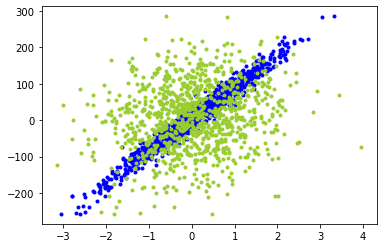

In [76]:
lw = 2
plt.scatter(X[:,0], y, color='blue', marker='.', label='Inliers');
plt.scatter(X[:,1], y, color='yellowgreen', marker='.', label='Inliers');

## Weights of OLS

Weighted LS can be used when OLS is violated with heteroscedascity, a variability of a variable monitored over different values of an independent value is not the same. It's a sign that residual errors (y_actual - y_predict) will not be consistent. The errors is allowed to be different than the identity matrix.

The weights of OLS which weighs the observations proportional to the reciprocal of the error variance for that observation. Below is the equation.

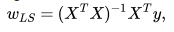

In [20]:
def least_squares_weights(input_x, target_y):
    """
    1. Need to transpose if row is less than cols
    2. create np ones of n x 1 matrix
    3. calculate least squares using 
    """
    if input_x.shape[0] < input_x.shape[1]:
        input_x = input_x.T

    if target_y.shape[0] < target_y.shape[1]:
        target_y = target_y.T

    ones = np.ones((len(target_y), 1), dtype=int)

    augmented_x = np.concatenate((ones, input_x), axis=1)

    # implement from above equation
    left_multiplier = np.matmul(np.linalg.inv(np.matmul(np.transpose(augmented_x), augmented_x)), np.transpose(augmented_x))
    w_ls = np.matmul(left_multiplier, target_y)

    return w_ls


In [81]:
training_y = np.array([y])
training_x = np.array(X)
weights = least_squares_weights(training_x, training_y)
print(weights)

[[ 3.5       ]
 [87.91985605]
 [16.88001901]]


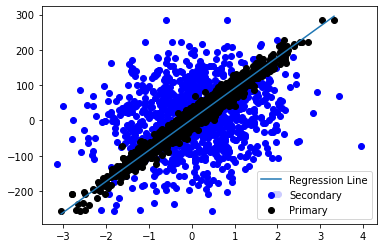

In [98]:
max_X = np.max(X[:,0])
min_X = np.min(X[:,0])

re_x = np.linspace(min_X, max_X, 1000)
re_y = weights[0][0] + weights[1][0] * re_x
plt.plot(re_x, re_y, label='Regression Line')
plt.scatter(X[:,1], y, c='b', label='Secondary')
plt.scatter(X[:,0], y, c='k', label='Primary')
plt.legend()
plt.show()


### Calculate RMSE
RMSE is simply the sqrt of the variance on the residuals

In [99]:
rmse = 0
b0 = weights[0][0]
b1 = weights[1][0]
for i in range(len(y)):
    y_pred = b0 + b1 * X[i]
    rmse += (y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/len(y))
rmse

array([ 16.94110415, 115.83332392])

### Ridge Regresion

Regularization is a way to peanlize additional features. Ridge and Lasso, both similar but one takes the absolute sum sqaure. Data should be mean centered and standardize.



Here, lambda (also known as alpha), if small or at zero, then it'll mimick Least Squares. Essentially all the features (coefficients) matters. Eventually, we will choose the lambda that minimizes validation error, which we can find when we do cross-validation. 

#### Standardize
Standardization is quite simple. It is just the distance from a observation to the mean over the standard deviation. If we standardize all data points, then values very large can be a lot easier to compare. Sample standardization has df of 0

In [100]:
def standardize(num_list):
    std = np.std(num_list)
    mean = np.mean(num_list)

    return [(x-mean)/std for x in num_list]

Find the min values based on the passed function values, similar to hyperparam tuning. Lambda search will minimize the error.

In [104]:
def minimize(passed_func):
    dummy_val = list(np.linspace(.1,49.9, 1000))
    func_val = [abs(np.mean(passed_func(x))) for x in dummy_val]
    min_mean = min(func_val)
    return dummy_val[func_val.index(min_mean)]


In [107]:
def ridge_regression_weights(x, y, alpha):
    """
    alpha here is lambda since lambda is a reserved wor in python, we use alpha
    """
    if x.shape[0] < x.shape[1]:
        x = x.T
    
    ones = np.ones((len(y), 1), dtype=int)

    aug_x = np.concatenate((ones, x), axis=1)
    
    alpha_mat = alpha * np.eye(min(aug_x.shape))

    inv = np.linalg.inv(alpha_mat + np.matmul(aug_x.T, aug_x))

    left_multiplier = np.matmul(inv , aug_x.T)
    weights = np.matmul(left_multiplier, y)
    return weights


In [109]:
def lambda_search_func(lambda_param):
    weights = ridge_regression_weights(X, y, lambda_param )
    y_pred = weights[0] + np.matmul(X,weights[1:])
    resid = y - y_pred

    return abs(resid)
minimize(lambda_search_func) 

0.1